## **Food Recognition & Calorie Estimation by Sana Liaqat**

The project focuses on developing a system that uses image processing and machine learning to recognize food items and estimate their calorie content, aiding users in managing their dietary intake.

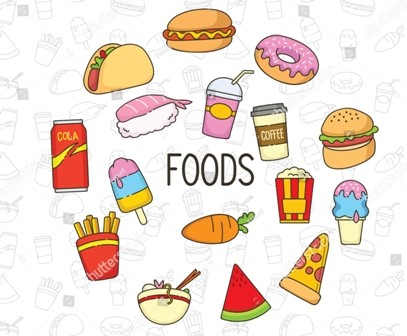

## **Importing Dependencies**

In [ ]:
import keras
keras.__version__

'2.15.0'

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import vgg16
from keras.src.layers.pooling.average_pooling2d import AvgPool2D
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dropout
from keras.models import Sequential
from keras.layers import Dense,Input,Flatten
from tensorflow.keras.utils import load_img,img_to_array
from sklearn.metrics import confusion_matrix
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

## **Loading Dataset from Kaggle**

In [ ]:
!pip install kaggle

!mkdir ~/.kaggle

!mv kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

mv: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download dansbecker/food-101

Dataset URL: https://www.kaggle.com/datasets/dansbecker/food-101
License(s): other
100% 9.37G/9.38G [08:37<00:00, 23.1MB/s]
100% 9.38G/9.38G [08:37<00:00, 19.5MB/s]


In [ ]:
!unzip -o /content/food-101.zip -d /content/food-101

Streaming output truncated to the last 5000 lines.
  inflating: /content/food-101/food-101/food-101/images/tacos/1030289.jpg  
  inflating: /content/food-101/food-101/food-101/images/tacos/1033196.jpg  
  inflating: /content/food-101/food-101/food-101/images/tacos/1036030.jpg  
  inflating: /content/food-101/food-101/food-101/images/tacos/1042175.jpg  
  inflating: /content/food-101/food-101/food-101/images/tacos/1044043.jpg  
  inflating: /content/food-101/food-101/food-101/images/tacos/1058697.jpg  
  inflating: /content/food-101/food-101/food-101/images/tacos/1059239.jpg  
  inflating: /content/food-101/food-101/food-101/images/tacos/1059326.jpg  
  inflating: /content/food-101/food-101/food-101/images/tacos/1066762.jpg  
  inflating: /content/food-101/food-101/food-101/images/tacos/1070967.jpg  
  inflating: /content/food-101/food-101/food-101/images/tacos/1073468.jpg  
  inflating: /content/food-101/food-101/food-101/images/tacos/1075296.jpg  
  inflating: /content/food-101/food-1

## **Classes & Calories**

The calories per gram for each food item:

      Apple Pie: ~2.5 calories per gram

      Baby Back Ribs: ~3.5 calories per gram

      Baklava: ~5 calories per

      Beef Carpaccio: ~2 calories per gram

      Beef Tartare: ~2.5 calories per gram

      Beet Salad: ~0.5 calories per gram

      Beignets: ~3.5 calories per gram

      Bibimbap: ~1.5 calories per gram

      Bread Pudding: ~2.5 calories per gram

      Breakfast Burrito: ~2 calories per gram

      Bruschetta: ~1 calorie per gram

      Caesar Salad: ~0.5 calories per gram

      Cannoli: ~3.5 calories per gram

      Caprese Salad: ~1 calorie per gram

      Carrot Cake: ~3.5 calories per gram

      Ceviche: ~0.5 calories per gram

      Cheese Plate: ~3.5 calories per gram

      Cheesecake: ~3.5 calories per gram

      Chicken Curry: ~1.5 calories per gram

      Chicken Quesadilla: ~2.5 calories per gram

      Chicken Wings: ~3 calories per gram

      Chocolate Cake: ~4 calories per gram

      Chocolate Mousse: ~3 calories per gram

      Churros: ~4 calories per gram

      Clam Chowder: ~1.5 calories per gram

      Club Sandwich: ~2.5 calories per gram

      Crab Cakes: ~2 calories per gram

      Creme Brulee: ~3.5 calories per gram

      Croque Madame: ~3 calories per gram

      Cupcakes: ~3.5 calories per gram

      Deviled Eggs: ~1 calorie per gram

      Donuts: ~4 calories per gram

      Dumplings: ~2.5 calories per gram

      Edamame: ~1 calorie per gram

      Eggs Benedict: ~2.5 calories per gram

      Escargots: ~1 calorie per gram

      Falafel: ~2 calories per gram

      Filet Mignon: ~2.5 calories per gram

      Fish and Chips: ~2.5 calories per gram

      Foie Gras: ~4.5 calories per gram

      French Fries: ~3.5 calories per gram

      French Onion Soup: ~1 calorie per gram

      French Toast: ~2 calories per gram

      Fried Calamari: ~2.5 calories per gram

      Fried Rice: ~1.5 calories per gram

      Frozen Yogurt: ~1 calorie per gram

      Garlic Bread: ~4 calories per gram

      Gnocchi: ~1.5 calories per gram

      Greek Salad: ~0.5 calories per gram

      Grilled Cheese Sandwich: ~3 calories per gram

      Grilled Salmon: ~2 calories per gram

      Guacamole: ~2 calories per gram

      Gyoza: ~2 calories per gram

      Hamburger: ~3.5 calories per gram

      Hot and Sour Soup: ~0.5 calories per gram

      Hot Dog: ~3.5 calories per gram

      Huevos Rancheros: ~2 calories per gram

      Hummus: ~1.5 calories per gram

      Ice Cream: ~2 calories per gram

      Lasagna: ~1.5 calories per gram

      Lobster Bisque: ~1 calorie per gram

      Lobster Roll Sandwich: ~2.5 calories per gram

      Macaroni and Cheese: ~3 calories per gram

      Macarons: ~4 calories per gram

      Miso Soup: ~0.5 calories per gram

      Mussels: ~0.5 calories per gram

      Nachos: ~2.5 calories per gram

      Omelette: ~1.5 calories per gram

      Onion Rings: ~2.5 calories per gram

      Oysters: ~0.5 calories per gram

      Pad Thai: ~2 calories per gram

      Paella: ~1.5 calories per gram

      Pancakes: ~2 calories per gram

      Panna Cotta: ~3.5 calories per gram

      Peking Duck: ~4 calories per gram

      Pho: ~1 calorie per gram

      Pizza: ~2.5 calories per gram

      Pork Chop: ~2.5 calories per gram

      Poutine: ~2.5 calories per gram

      Prime Rib: ~2.5 calories per gram

      Pulled Pork Sandwich: ~2.5 calories per gram

      Ramen: ~1 calorie per gram

      Ravioli: ~1.5 calories per gram

      Red Velvet Cake: ~4 calories per gram

      Risotto: ~1.5 calories per gram

      Samosa: ~2 calories per gram

      Sashimi: ~1 calorie per gram

      Scallops: ~1 calorie per gram

      Seaweed Salad: ~0.5 calories per gram

      Shrimp and Grits: ~2 calories per gram

      Spaghetti Bolognese: ~1.5 calories per gram

      Spaghetti Carbonara: ~2 calories per gram

      Spring Rolls: ~1.5 calories per gram

      Steak: ~2.5 calories per gram

      Strawberry Shortcake: ~3.5 calories per gram

      Sushi: ~1 calorie per gram

      Tacos: ~2 calories per gram

      Takoyaki: ~2.5 calories per gram

      Tiramisu: ~3 calories per gram

      Tuna Tartare: ~1.5 calories per gram

      Waffles: ~2 calories per gram

These values are approximations and can vary based on factors such as ingredients and cooking methods.

In [ ]:
# List the contents of the images directory
import os
print(os.listdir("/content/food-101"))

['food-101', 'food-101.zip']


In [ ]:
print(os.listdir("/content/food-101/food-101/food-101/images/"))

['sushi', 'bruschetta', 'beef_carpaccio', 'bibimbap', 'omelette', 'french_fries', 'deviled_eggs', 'spaghetti_bolognese', 'lobster_roll_sandwich', 'filet_mignon', 'hamburger', 'gyoza', 'strawberry_shortcake', 'garlic_bread', 'miso_soup', 'mussels', 'creme_brulee', 'hummus', 'lobster_bisque', 'breakfast_burrito', 'frozen_yogurt', 'panna_cotta', 'lasagna', 'macaroni_and_cheese', 'risotto', 'ravioli', 'french_toast', 'cup_cakes', 'baklava', 'pork_chop', 'baby_back_ribs', 'escargots', 'pho', 'grilled_salmon', 'edamame', 'fried_calamari', 'beef_tartare', 'falafel', 'poutine', 'chocolate_mousse', 'ice_cream', 'shrimp_and_grits', 'spring_rolls', 'onion_rings', 'chicken_wings', 'hot_and_sour_soup', 'steak', 'seaweed_salad', 'tacos', 'bread_pudding', 'beet_salad', 'prime_rib', 'guacamole', 'caprese_salad', 'apple_pie', 'tuna_tartare', 'sashimi', 'churros', 'fried_rice', 'greek_salad', 'pulled_pork_sandwich', 'club_sandwich', 'nachos', 'pad_thai', 'cannoli', 'beignets', 'pizza', 'peking_duck', 'o

In [ ]:
values = ['macarons', 'french_toast', 'lobster_bisque', 'prime_rib', 'pork_chop', 'guacamole', 'baby_back_ribs', 'mussels', 'beef_carpaccio', 'poutine', 'hot_and_sour_soup', 'seaweed_salad', 'foie_gras', 'dumplings', 'peking_duck', 'takoyaki', 'bibimbap', 'falafel', 'pulled_pork_sandwich', 'lobster_roll_sandwich', 'carrot_cake', 'beet_salad', 'panna_cotta', 'donuts', 'red_velvet_cake', 'grilled_cheese_sandwich', 'cannoli', 'spring_rolls', 'shrimp_and_grits', 'clam_chowder', 'omelette', 'fried_calamari', 'caprese_salad', 'oysters', 'scallops', 'ramen', 'grilled_salmon', 'croque_madame', 'filet_mignon', 'hamburger', 'spaghetti_carbonara', 'miso_soup', 'bread_pudding', 'lasagna', 'crab_cakes', 'cheesecake', 'spaghetti_bolognese', 'cup_cakes', 'creme_brulee', 'waffles', 'fish_and_chips', 'paella', 'macaroni_and_cheese', 'chocolate_mousse', 'ravioli', 'chicken_curry', 'caesar_salad', 'nachos', 'tiramisu', 'frozen_yogurt', 'ice_cream', 'risotto', 'club_sandwich', 'strawberry_shortcake', 'steak', 'churros', 'garlic_bread', 'baklava', 'bruschetta', 'hummus', 'chicken_wings', 'greek_salad', 'tuna_tartare', 'chocolate_cake', 'gyoza', 'eggs_benedict', 'deviled_eggs', 'samosa', 'sushi', 'breakfast_burrito', 'ceviche', 'beef_tartare', 'apple_pie', '.DS_Store', 'huevos_rancheros', 'beignets', 'pizza', 'edamame', 'french_onion_soup', 'hot_dog', 'tacos', 'chicken_quesadilla', 'pho', 'gnocchi', 'pancakes', 'fried_rice', 'cheese_plate', 'onion_rings', 'escargots', 'sashimi', 'pad_thai', 'french_fries']
values.sort()
values = values[1:]
print(values)

['apple_pie', 'baby_back_ribs', 'baklava', 'beef_carpaccio', 'beef_tartare', 'beet_salad', 'beignets', 'bibimbap', 'bread_pudding', 'breakfast_burrito', 'bruschetta', 'caesar_salad', 'cannoli', 'caprese_salad', 'carrot_cake', 'ceviche', 'cheese_plate', 'cheesecake', 'chicken_curry', 'chicken_quesadilla', 'chicken_wings', 'chocolate_cake', 'chocolate_mousse', 'churros', 'clam_chowder', 'club_sandwich', 'crab_cakes', 'creme_brulee', 'croque_madame', 'cup_cakes', 'deviled_eggs', 'donuts', 'dumplings', 'edamame', 'eggs_benedict', 'escargots', 'falafel', 'filet_mignon', 'fish_and_chips', 'foie_gras', 'french_fries', 'french_onion_soup', 'french_toast', 'fried_calamari', 'fried_rice', 'frozen_yogurt', 'garlic_bread', 'gnocchi', 'greek_salad', 'grilled_cheese_sandwich', 'grilled_salmon', 'guacamole', 'gyoza', 'hamburger', 'hot_and_sour_soup', 'hot_dog', 'huevos_rancheros', 'hummus', 'ice_cream', 'lasagna', 'lobster_bisque', 'lobster_roll_sandwich', 'macaroni_and_cheese', 'macarons', 'miso_sou

In [ ]:
print("Number of classes:",len(values))

Number of classes: 101


In [ ]:
s = """Apple Pie: ~2.5 calories per gram
Baby Back Ribs: ~3.5 calories per gram
Baklava: ~5 calories per gram
Beef Carpaccio: ~2 calories per gram
Beef Tartare: ~2.5 calories per gram
Beet Salad: ~0.5 calories per gram
Beignets: ~3.5 calories per gram
Bibimbap: ~1.5 calories per gram
Bread Pudding: ~2.5 calories per gram
Breakfast Burrito: ~2 calories per gram
Bruschetta: ~1 calorie per gram
Caesar Salad: ~0.5 calories per gram
Cannoli: ~3.5 calories per gram
Caprese Salad: ~1 calorie per gram
Carrot Cake: ~3.5 calories per gram
Ceviche: ~0.5 calories per gram
Cheese Plate: ~3.5 calories per gram
Cheesecake: ~3.5 calories per gram
Chicken Curry: ~1.5 calories per gram
Chicken Quesadilla: ~2.5 calories per gram
Chicken Wings: ~3 calories per gram
Chocolate Cake: ~4 calories per gram
Chocolate Mousse: ~3 calories per gram
Churros: ~4 calories per gram
Clam Chowder: ~1.5 calories per gram
Club Sandwich: ~2.5 calories per gram
Crab Cakes: ~2 calories per gram
Creme Brulee: ~3.5 calories per gram
Croque Madame: ~3 calories per gram
Cupcakes: ~3.5 calories per gram
Deviled Eggs: ~1 calorie per gram
Donuts: ~4 calories per gram
Dumplings: ~2.5 calories per gram
Edamame: ~1 calorie per gram
Eggs Benedict: ~2.5 calories per gram
Escargots: ~1 calorie per gram
Falafel: ~2 calories per gram
Filet Mignon: ~2.5 calories per gram
Fish and Chips: ~2.5 calories per gram
Foie Gras: ~4.5 calories per gram
French Fries: ~3.5 calories per gram
French Onion Soup: ~1 calorie per gram
French Toast: ~2 calories per gram
Fried Calamari: ~2.5 calories per gram
Fried Rice: ~1.5 calories per gram
Frozen Yogurt: ~1 calorie per gram
Garlic Bread: ~4 calories per gram
Gnocchi: ~1.5 calories per gram
Greek Salad: ~0.5 calories per gram
Grilled Cheese Sandwich: ~3 calories per gram
Grilled Salmon: ~2 calories per gram
Guacamole: ~2 calories per gram
Gyoza: ~2 calories per gram
Hamburger: ~3.5 calories per gram
Hot and Sour Soup: ~0.5 calories per gram
Hot Dog: ~3.5 calories per gram
Huevos Rancheros: ~2 calories per gram
Hummus: ~1.5 calories per gram
Ice Cream: ~2 calories per gram
Lasagna: ~1.5 calories per gram
Lobster Bisque: ~1 calorie per gram
Lobster Roll Sandwich: ~2.5 calories per gram
Macaroni and Cheese: ~3 calories per gram
Macarons: ~4 calories per gram
Miso Soup: ~0.5 calories per gram
Mussels: ~0.5 calories per gram
Nachos: ~2.5 calories per gram
Omelette: ~1.5 calories per gram
Onion Rings: ~2.5 calories per gram
Oysters: ~0.5 calories per gram
Pad Thai: ~2 calories per gram
Paella: ~1.5 calories per gram
Pancakes: ~2 calories per gram
Panna Cotta: ~3.5 calories per gram
Peking Duck: ~4 calories per gram
Pho: ~1 calorie per gram
Pizza: ~2.5 calories per gram
Pork Chop: ~2.5 calories per gram
Poutine: ~2.5 calories per gram
Prime Rib: ~2.5 calories per gram
Pulled Pork Sandwich: ~2.5 calories per gram
Ramen: ~1 calorie per gram
Ravioli: ~1.5 calories per gram
Red Velvet Cake: ~4 calories per gram
Risotto: ~1.5 calories per gram
Samosa: ~2 calories per gram
Sashimi: ~1 calorie per gram
Scallops: ~1 calorie per gram
Seaweed Salad: ~0.5 calories per gram
Shrimp and Grits: ~2 calories per gram
Spaghetti Bolognese: ~1.5 calories per gram
Spaghetti Carbonara: ~2 calories per gram
Spring Rolls: ~1.5 calories per gram
Steak: ~2.5 calories per gram
Strawberry Shortcake: ~3.5 calories per gram
Sushi: ~1 calorie per gram
Tacos: ~2 calories per gram
Takoyaki: ~2.5 calories per gram
Tiramisu: ~3 calories per gram
Tuna Tartare: ~1.5 calories per gram
Waffles: ~2 calories per gram
"""
calories = s.splitlines()
s = "These values are approximations and can vary based on factors such as ingredients and cooking methods."

In [ ]:
len(calories)

101

In [ ]:
calories[0]

'Apple Pie: ~2.5 calories per gram'

In [ ]:
print("First element:",values[0],"\nLast element:",values[-1])

First element: apple_pie 
Last element: waffles


In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,validation_split=0.1)
train_data = train_datagen.flow_from_directory('/content/food-101/food-101/food-101/images/',
                                               target_size=(224,224),
                                               batch_size=100,
                                               class_mode='categorical',
                                               shuffle=True,
                                               subset='training')
test_data = train_datagen.flow_from_directory('/content/food-101/food-101/food-101/images/',
                                               target_size=(224,224),
                                               batch_size=100,
                                               class_mode='categorical',
                                               shuffle=False,
                                               subset='validation')

Found 90900 images belonging to 101 classes.
Found 10100 images belonging to 101 classes.


In [ ]:
print("Images Shape:",train_data.image_shape)

Images Shape: (224, 224, 3)


In [ ]:
print('\nBatch Size:',100,
     "\nNunmber of Batches in training set:",len(train_data),
     "\nNunmber of Batches in testing set:",len(test_data),
     "\nNumber of Samples in training set:",train_data.samples,"Samples",
     "\nNumber of Samples in testing set:",test_data.samples,"Samples")


Batch Size: 100 
Nunmber of Batches in training set: 909 
Nunmber of Batches in testing set: 101 
Number of Samples in training set: 90900 Samples 
Number of Samples in testing set: 10100 Samples


In [ ]:
print("\nThe 101 Classes numbers:\n",np.unique(train_data.labels),"\n",
       "_"*30,
       "\nThe 101 classes names:\n",train_data.class_indices,
      sep="")


The 101 Classes numbers:
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100]
______________________________
The 101 classes names:
{'apple_pie': 0, 'baby_back_ribs': 1, 'baklava': 2, 'beef_carpaccio': 3, 'beef_tartare': 4, 'beet_salad': 5, 'beignets': 6, 'bibimbap': 7, 'bread_pudding': 8, 'breakfast_burrito': 9, 'bruschetta': 10, 'caesar_salad': 11, 'cannoli': 12, 'caprese_salad': 13, 'carrot_cake': 14, 'ceviche': 15, 'cheese_plate': 16, 'cheesecake': 17, 'chicken_curry': 18, 'chicken_quesadilla': 19, 'chicken_wings': 20, 'chocolate_cake': 21, 'chocolate_mousse': 22, 'churros': 23, 'clam_chowder': 24, 'club_sandwich': 25, 'crab_cake

In [ ]:
train_data.image_shape

(224, 224, 3)

In [ ]:
np.unique(train_data.labels)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100], dtype=int32)

In [ ]:
np.unique(test_data.labels)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100], dtype=int32)

In [ ]:
train_data.class_indices

{'apple_pie': 0,
 'baby_back_ribs': 1,
 'baklava': 2,
 'beef_carpaccio': 3,
 'beef_tartare': 4,
 'beet_salad': 5,
 'beignets': 6,
 'bibimbap': 7,
 'bread_pudding': 8,
 'breakfast_burrito': 9,
 'bruschetta': 10,
 'caesar_salad': 11,
 'cannoli': 12,
 'caprese_salad': 13,
 'carrot_cake': 14,
 'ceviche': 15,
 'cheese_plate': 16,
 'cheesecake': 17,
 'chicken_curry': 18,
 'chicken_quesadilla': 19,
 'chicken_wings': 20,
 'chocolate_cake': 21,
 'chocolate_mousse': 22,
 'churros': 23,
 'clam_chowder': 24,
 'club_sandwich': 25,
 'crab_cakes': 26,
 'creme_brulee': 27,
 'croque_madame': 28,
 'cup_cakes': 29,
 'deviled_eggs': 30,
 'donuts': 31,
 'dumplings': 32,
 'edamame': 33,
 'eggs_benedict': 34,
 'escargots': 35,
 'falafel': 36,
 'filet_mignon': 37,
 'fish_and_chips': 38,
 'foie_gras': 39,
 'french_fries': 40,
 'french_onion_soup': 41,
 'french_toast': 42,
 'fried_calamari': 43,
 'fried_rice': 44,
 'frozen_yogurt': 45,
 'garlic_bread': 46,
 'gnocchi': 47,
 'greek_salad': 48,
 'grilled_cheese_sa

In [ ]:
from tensorflow.keras.applications.densenet import DenseNet121, DenseNet169, DenseNet201
new_input = Input(shape=(224, 224, 3))
base_model = DenseNet201(weights='imagenet', include_top=False, input_tensor=new_input)
# base_model.summary()

74836368/74836368 [==============================] - 6s 0us/step


In [ ]:
for layer in base_model.layers[:]:
  layer.trainable = False
# vgg16_model.summary()

In [ ]:
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dense(1000, activation='relu'))
# model.add(Dropout(0.25))
model.add(Dense(101, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet201 (Functional)    (None, 7, 7, 1920)        18321984  
                                                                 
 flatten (Flatten)           (None, 94080)             0         
                                                                 
 dense (Dense)               (None, 1000)              94081000  
                                                                 
 dense_1 (Dense)             (None, 1000)              1001000   
                                                                 
 dense_2 (Dense)             (None, 101)               101101    
                                                                 
Total params: 113505085 (432.99 MB)
Trainable params: 95183101 (363.09 MB)
Non-trainable params: 18321984 (69.89 MB)
_________________________________________________________________


In [ ]:
len(test_data)

101

In [ ]:
import tensorflow as tf
gpu_options = tf.compat.v1.GPUOptions(allow_growth=True)
session = tf.compat.v1.InteractiveSession(config=tf.compat.v1.ConfigProto(gpu_options=gpu_options))

In [ ]:
from keras.optimizers import Adam
model.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
from tensorflow.keras.callbacks import EarlyStopping
results = model.fit(train_data, epochs=5, validation_data=test_data,
                  steps_per_epoch=len(train_data), validation_steps=len(test_data),
                  callbacks = EarlyStopping(patience=5, monitor='val_accuracy',restore_best_weights=True)
                  )

Epoch 1/5
909/909 [==============================] - 548s 572ms/step - loss: 3.7064 - accuracy: 0.3418 - val_loss: 2.1491 - val_accuracy: 0.4493
Epoch 2/5
909/909 [==============================] - 520s 571ms/step - loss: 1.9118 - accuracy: 0.4990 - val_loss: 2.0451 - val_accuracy: 0.4783
Epoch 3/5
909/909 [==============================] - 506s 556ms/step - loss: 1.6778 - accuracy: 0.5520 - val_loss: 2.0609 - val_accuracy: 0.4734
Epoch 4/5
909/909 [==============================] - 506s 557ms/step - loss: 1.5260 - accuracy: 0.5857 - val_loss: 2.0814 - val_accuracy: 0.4812
Epoch 5/5
909/909 [==============================] - 493s 542ms/step - loss: 1.4071 - accuracy: 0.6131 - val_loss: 2.1353 - val_accuracy: 0.4814


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
loss , acc = model.evaluate(test_data)

101/101 [==============================] - 47s 457ms/step - loss: 2.1353 - accuracy: 0.4814


In [ ]:
print("Test accuracy:", round(acc,4)*100,'%', "\nLoss value:",loss)

Test accuracy: 48.14 % 
Loss value: 2.1352531909942627


In [ ]:
results.history['val_accuracy']

[0.4493069350719452,
 0.4783168435096741,
 0.4733663499355316,
 0.4811881184577942,
 0.48138612508773804]

In [ ]:
results.history['val_loss']

[2.149122476577759,
 2.045135021209717,
 2.0608603954315186,
 2.081359386444092,
 2.1352531909942627]

In [ ]:
i = results.history['val_loss'].index(2.081359386444092)
i

3

In [ ]:
results.history['val_accuracy'][i]

0.4811881184577942

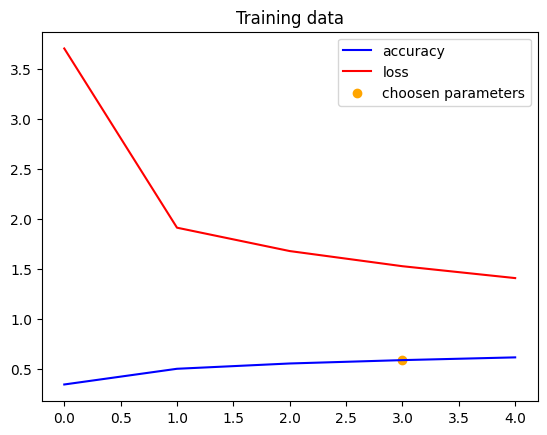

In [ ]:
fig = plt.figure()
plt.plot(results.history['accuracy'], c='blue', label='accuracy')
plt.plot(results.history['loss'], c='red', label='loss')
plt.scatter(i,results.history['accuracy'][i], c='orange', marker='o', label='choosen parameters')
plt.title('Training data')
plt.legend(loc='upper right')
plt.show()

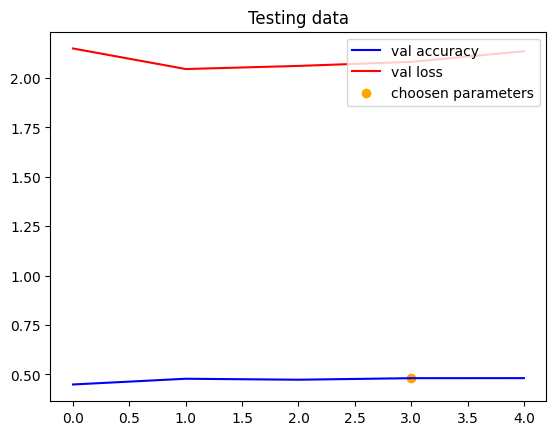

In [ ]:
fig = plt.figure()
plt.plot(results.history['val_accuracy'], c='blue', label='val accuracy')
plt.plot(results.history['val_loss'], c='red', label='val loss')
plt.scatter(i,results.history['val_accuracy'][i], c='orange', marker='o', label='choosen parameters')
plt.title('Testing data')
plt.legend(loc='upper right')
plt.show()

Macarons Sample


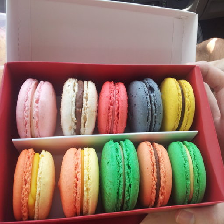

In [ ]:
print("Macarons Sample")
macarons = load_img("/content/food-101/food-101/food-101/images/macarons/2428554.jpg",target_size=(224,224))
macarons

Pizza Sample


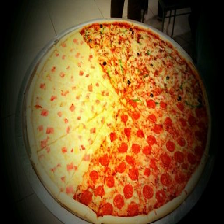

In [ ]:
print("Pizza Sample")
pizza = load_img("/content/food-101/food-101/food-101/images/pizza/768276.jpg",target_size=(224,224,3))
pizza

Donuts Sample


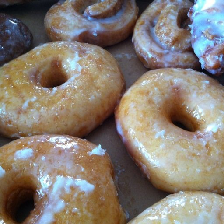

In [ ]:
print("Donuts Sample")
donuts = load_img("/content/food-101/food-101/food-101/images/donuts/2563686.jpg",target_size=(224,224,3))
donuts

Frensh Toast Sample


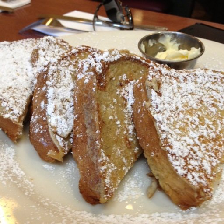

In [ ]:
print("Frensh Toast Sample")
toast = load_img("/content/food-101/food-101/food-101/images/french_toast/2769309.jpg",target_size=(224,224,3))
toast

French_fries Sample


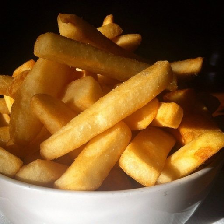

In [ ]:
print("French_fries Sample")
fries = load_img("/content/food-101/food-101/food-101/images/french_fries/2246621.jpg",target_size=(224,224))
fries

Tiramisu Sample


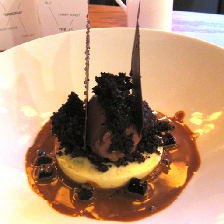

In [ ]:
print("Tiramisu Sample")
tiramisu = load_img("/content/food-101/food-101/food-101/images/tiramisu/827370.jpg",target_size=(224,224))
tiramisu

Tacos Sample


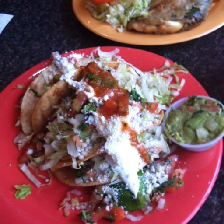

In [ ]:
print("Tacos Sample")
tacos = load_img("/content/food-101/food-101/food-101/images/tacos/1044043.jpg",target_size=(224,224))
tacos

Text(0.5, 1.0, 'Tacos')

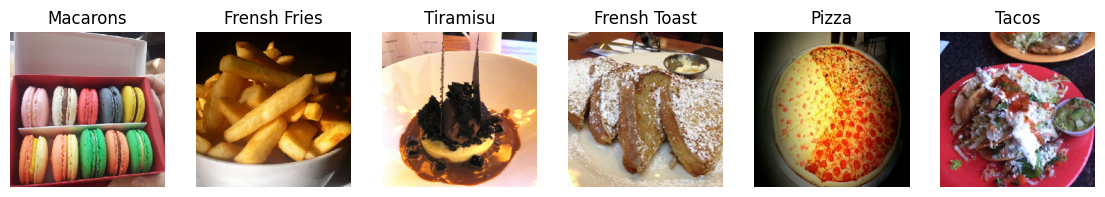

In [ ]:
fig = plt.figure(figsize=(14,7))
# plt.grid=False
fig.add_subplot(1, 6, 1)
plt.axis('off')
plt.imshow(macarons)
plt.title("Macarons")
# _____________________________________________
fig.add_subplot(1, 6, 2)
plt.axis('off')
plt.imshow(fries)
plt.title("Frensh Fries")
# _____________________________________________
fig.add_subplot(1, 6, 3)
plt.axis('off')
plt.imshow(tiramisu)
plt.title("Tiramisu")
# _____________________________________________
fig.add_subplot(1, 6, 4)
plt.axis('off')
plt.imshow(toast)
plt.title("Frensh Toast")
# _____________________________________________
fig.add_subplot(1, 6, 5)
plt.axis('off')
plt.imshow(pizza)
plt.title("Pizza")
# _____________________________________________
fig.add_subplot(1, 6, 6)
plt.axis('off')
plt.imshow(tacos)
plt.title("Tacos")

In [ ]:
macarons = img_to_array(macarons)
fries = img_to_array(fries)
tiramisu = img_to_array(tiramisu)
pizza = img_to_array(pizza)
tacos = img_to_array(tacos)
toast = img_to_array(toast)
macarons = macarons/255
fries = fries/255
tiramisu = tiramisu/255
pizza = pizza/255
tacos = tacos/255
toast = toast/255
macarons = macarons.reshape(1,224,224,3)
fries = fries.reshape(1,224,224,3)
tiramisu = tiramisu.reshape(1,224,224,3)
pizza = pizza.reshape(1,224,224,3)
tacos = tacos.reshape(1,224,224,3)
toast = toast.reshape(1,224,224,3)

macarons.shape

(1, 224, 224, 3)

In [ ]:
p1 = (model.predict(macarons)).argmax()

print("Class ",p1,": ",values[p1],sep='')
print(calories[p1],'\nNote:',s)

1/1 [==============================] - 7s 7s/step
Class 63: macarons
Macarons: ~4 calories per gram 
Note: These values are approximations and can vary based on factors such as ingredients and cooking methods.


In [ ]:
p2 = (model.predict(fries)).argmax()

print("Class ",p2,": ",values[p2],sep='')
print(calories[p2],'\nNote:',s)

1/1 [==============================] - 0s 60ms/step
Class 40: french_fries
French Fries: ~3.5 calories per gram 
Note: These values are approximations and can vary based on factors such as ingredients and cooking methods.


In [ ]:
p3 = (model.predict(tiramisu)).argmax()

print("Class ",p3,": ",values[p3],sep='')
print(calories[p3],'\nNote:',s)

1/1 [==============================] - 0s 71ms/step
Class 22: chocolate_mousse
Chocolate Mousse: ~3 calories per gram 
Note: These values are approximations and can vary based on factors such as ingredients and cooking methods.


In [ ]:
p4 = (model.predict(pizza)).argmax()

print("Class ",p4,": ",values[p4],sep='')
print(calories[p4],'\nNote:',s)

1/1 [==============================] - 0s 35ms/step
Class 76: pizza
Pizza: ~2.5 calories per gram 
Note: These values are approximations and can vary based on factors such as ingredients and cooking methods.


In [ ]:
p5 = (model.predict(tacos)).argmax()

print("Class ",p5,": ",values[p5],sep='')
print(calories[p5],'\nNote:',s)

1/1 [==============================] - 0s 58ms/step
Class 96: tacos
Tacos: ~2 calories per gram 
Note: These values are approximations and can vary based on factors such as ingredients and cooking methods.


In [71]:
p6 = (model.predict(toast)).argmax()

print("Class ",p6,": ",values[p6],sep='')
print(calories[p6],'\nNote:',s)

1/1 [==============================] - 0s 147ms/step
Class 42: french_toast
French Toast: ~2 calories per gram 
Note: These values are approximations and can vary based on factors such as ingredients and cooking methods.
